In [9]:
import pandas as pd
import numpy as np
import scorecardpy as sc
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import HTML, display
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
pd.set_option('display.max_columns', None)

### Выгрузка данных и пробработка данных

In [11]:
df = pd.read_excel('BB_Wave1-3_MATCH_FILES_Coord_f2f_v1_New.xlsx')
directory = pd.read_excel('BB_Wave1-3_MATCH_FILES_Coord_f2f_v1_New.xlsx', sheet_name=1)

In [12]:
task1_df = df.copy()
task1_df = task1_df[task1_df['Wave_number'] != 3]
task1_df = task1_df[['V1', 'C3', 'C5', 'C8', 'B3', 'B4', 'B6']]
task1_df['B6'].replace({2: 3, 3: 2}, inplace =True)

In [13]:
task1_df['V1'].unique()

array([5, 7, 12, 18, 21, 23, 26, 32, 35, 46, 48, 51, 53, 56, 59, 61, 63,
       65, 68, 71, 73, 74, 80], dtype=object)

In [14]:
for i in task1_df['V1'].unique():
    print(f'{i} : { len(task1_df[task1_df["V1"]==i]) }  { len(task1_df[task1_df["V1"]==i])*100/len(task1_df) }')

5 : 120  3.862246540070808
7 : 125  4.023173479240425
12 : 193  6.211779851947216
18 : 146  4.699066623752816
21 : 100  3.21853878339234
23 : 119  3.8300611522368846
26 : 126  4.055358867074348
32 : 121  3.8944319279047312
35 : 80  2.574831026713872
46 : 199  6.404892178950757
48 : 120  3.862246540070808
51 : 207  6.662375281622143
53 : 127  4.087544254908272
56 : 127  4.087544254908272
59 : 109  3.5082072738976504
61 : 124  3.9909880914065012
63 : 159  5.11747666559382
65 : 120  3.862246540070808
68 : 120  3.862246540070808
71 : 122  3.9266173157386546
73 : 119  3.8300611522368846
74 : 85  2.7357579658834887
80 : 239  7.6923076923076925


In [15]:
task1_df

,V1,C3,C5,C8,B3,B4,B6
0,5,1,24,3,2,2,1
1,5,2,26,4,1,1,1
2,5,3,30,3,1,1,1
3,5,2,38,4,1,1,1
4,5,2,26,2,1,1,1
...,...,...,...,...,...,...,...
3102,80,3,35,1,1,1,1
3103,80,2,36,3,1,1,1
3104,80,1,39,3,3,,3
3105,80,1,23,3,1,1,2


In [16]:
def informed_new(row):
    try:
        temp=row[0]+row[1]+row[2]
        if temp > 4:
            return 1
        else:
            return 0
    except:
        return 1

In [17]:
task1_df['informed'] = task1_df[['B3', 'B4', 'B6']].apply(informed_new,  axis=1)

In [18]:
data_model = task1_df.drop(columns=['B3', 'B4', 'B6'])

In [19]:
region = {"1_reg" : [12 , 80, 63, 46, 51, 32] ,
        "2_reg" : [23, 5, 53, 26, 68, 21],
        "3_reg" : [18, 71, 56, 48, 59, 61],
        "4_reg" : [65, 7, 74, 35, 73]}

In [20]:
region.keys()

dict_keys(['1_reg', '2_reg', '3_reg', '4_reg'])

In [21]:
def region_ch(row):
    for reg in region.keys():
        if row in region[reg]:
            return reg

In [22]:
data_model['region'] = data_model['V1'].apply(region_ch)

In [23]:
for i in data_model['region'].unique():
    print(f'{i} : { len(data_model[data_model["region"]==i]) }  { len(data_model[data_model["region"]==i])*100/len(data_model) }')

2_reg : 712  22.91599613775346
4_reg : 529  17.026070164145477
1_reg : 1118  35.98326359832636
3_reg : 748  24.074670099774703


In [24]:
data_model.drop(columns = ['V1'], inplace = True)

In [25]:
data_model

,C3,C5,C8,informed,region
0,1,24,3,1,2_reg
1,2,26,4,0,2_reg
2,3,30,3,0,2_reg
3,2,38,4,0,2_reg
4,2,26,2,0,2_reg
...,...,...,...,...,...
3102,3,35,1,0,1_reg
3103,2,36,3,0,1_reg
3104,1,39,3,1,1_reg
3105,1,23,3,0,1_reg


In [26]:
data_model['C3'].replace({1: 'first', 2:'second', 3:'third_p'}, inplace =True)
data_model['C8'].replace({1: 'poor_l', 2:'poor_h', 3:'midle_l', 4:'midle_h', 5:'rich', 9:'none'}, inplace =True)
data_model = data_model[data_model['C5'] != ' ']
data_model['C5'] = data_model['C5'].astype(int)

C:\Users\Nastya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
data_model

,C3,C5,C8,informed,region
0,first,24,midle_l,1,2_reg
1,second,26,midle_h,0,2_reg
2,third_p,30,midle_l,0,2_reg
3,second,38,midle_h,0,2_reg
4,second,26,poor_h,0,2_reg
...,...,...,...,...,...
3102,third_p,35,poor_l,0,1_reg
3103,second,36,midle_l,0,1_reg
3104,first,39,midle_l,1,1_reg
3105,first,23,midle_l,0,1_reg


In [31]:
breaks_adj = {
    'region': ["1_reg","2_reg","3_reg","4_reg"]
}

In [32]:
bins = sc.woebin(data_model, y="informed", breaks_list=breaks_adj)

[INFO] creating woe binning ...


In [33]:
bins['region']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,region,1_reg,1113,0.359729,681,432,0.388140,0.168025,0.010395,0.076728,1_reg,False
1,region,2_reg,710,0.229476,538,172,0.242254,-0.517202,0.055791,0.076728,2_reg,False
2,region,3_reg,743,0.240142,448,295,0.397039,0.205344,0.010412,0.076728,3_reg,False
3,region,4_reg,528,0.170653,347,181,0.342803,-0.027666,0.000130,0.076728,4_reg,False


In [34]:
bins['C3']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,C3,third_p,428,0.138332,344,84,0.196262,-0.786663,0.073181,0.199968,third_p,False
1,C3,second,1141,0.368778,826,315,0.276074,-0.340860,0.040379,0.199968,second,False
2,C3,first,1525,0.492889,844,681,0.446557,0.408572,0.086408,0.199968,first,False


In [35]:
bins['C5']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,C5,"[-inf,22.0)",379,0.122495,226,153,0.403694,0.233065,0.006864,0.025754,22.0,False
1,C5,"[22.0,28.0)",1097,0.354557,697,400,0.364631,0.067841,0.001648,0.025754,28.0,False
2,C5,"[28.0,30.0)",420,0.135747,276,144,0.342857,-0.027426,0.000102,0.025754,30.0,False
3,C5,"[30.0,32.0)",371,0.119910,263,108,0.291105,-0.266861,0.008162,0.025754,32.0,False
4,C5,"[32.0,38.0)",655,0.211700,450,205,0.312977,-0.163076,0.005483,0.025754,38.0,False
5,C5,"[38.0,inf)",172,0.055591,102,70,0.406977,0.246684,0.003495,0.025754,inf,False


In [36]:
bins['C8']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,C8,"rich%,%none%,%poor_l%,%midle_l",1882,0.608274,1254,628,0.333688,-0.068392,0.002815,0.007619,"rich%,%none%,%poor_l%,%midle_l",False
1,C8,midle_h,337,0.108920,216,121,0.359050,0.043674,0.000209,0.007619,midle_h,False
2,C8,poor_h,875,0.282805,544,331,0.378286,0.126331,0.004595,0.007619,poor_h,False


{'region': <Figure size 432x288 with 2 Axes>,
 'C8': <Figure size 432x288 with 2 Axes>,
 'C5': <Figure size 432x288 with 2 Axes>,
 'C3': <Figure size 432x288 with 2 Axes>}

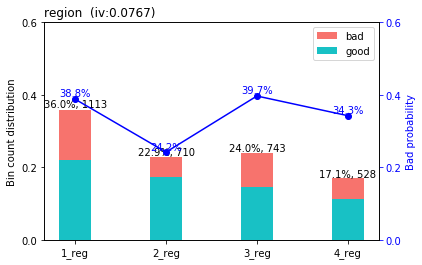

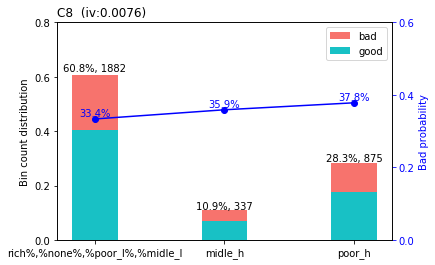

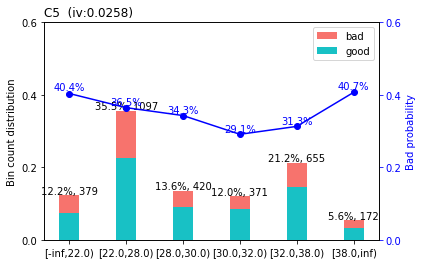

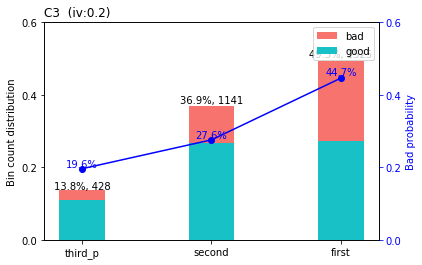

In [37]:
sc.woebin_plot(bins)

In [194]:
data_woe = sc.woebin_ply(data_model, bins)

[INFO] converting into woe values ...


In [197]:
y_true = data_woe.pop('informed').values
features = data_woe

In [200]:
model = LogisticRegression()
model.fit(features, y_true)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
model_pred = model.predict_proba(features)[:,1]

In [205]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, model_pred)
auc = metrics.auc(fpr, tpr)

In [206]:
print(f"gini model: {round(100*((2 * auc) - 1), 4)}%")

gini model: 30.1535%


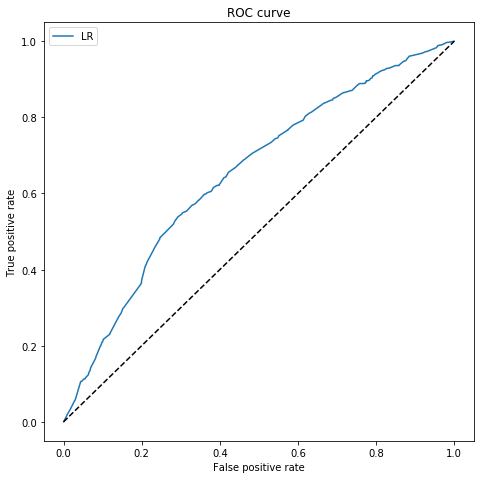

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(7.7, 7.7)

plt.plot(fpr, tpr, label='LR')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()